In [2]:
import numpy as np, matplotlib.pyplot as plt, glob, os

### Specify data files to display

In [1]:
fnameP = 'Y:/wavelet/wavelet_dlc_euclidean-midline_no-abspos_no-vel_00000000010001000000010001_1_20/'
fnameP+= 'wavelet_dlc_euclidean-midline_no-abspos_no-vel_00000000010001000000010001_1_20_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy'
fnameP = '\\\\?\\' + fnameP.replace('/', '\\')

fnameA = 'Y:/wavelet/wavelet_dlc_euclidean_no-abspos_no-vel_00000010001000000010001000_1_20/'
fnameA+= 'wavelet_dlc_euclidean_no-abspos_no-vel_00000010001000000010001000_1_20_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy'
fnameA = '\\\\?\\' + fnameA.replace('/', '\\')

fnames = [fnameP, fnameA]

### Find corresponding file for single-recording embedding

In [3]:
for fname in fnames[:2]:
    fn = 'Z:/behavior/4-9-19-a/embeddings/' + os.path.basename(fname)
    fn = '\\\\?\\' + fn.replace('\\\\?\\', '').replace('/', '\\')
    fns = glob.glob(fn)
    if len(fns) > 0:
        fnames.append(fns[0])
    else:
        fnames.append(None)
        
fnames

['\\\\?\\Y:\\wavelet\\wavelet_dlc_euclidean-midline_no-abspos_no-vel_00000000010001000000010001_1_20\\wavelet_dlc_euclidean-midline_no-abspos_no-vel_00000000010001000000010001_1_20_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy',
 '\\\\?\\Y:\\wavelet\\wavelet_dlc_euclidean_no-abspos_no-vel_00000010001000000010001000_1_20\\wavelet_dlc_euclidean_no-abspos_no-vel_00000010001000000010001000_1_20_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy',
 '\\\\?\\Z:\\behavior\\4-9-19-a\\embeddings\\wavelet_dlc_euclidean-midline_no-abspos_no-vel_00000000010001000000010001_1_20_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy',
 '\\\\?\\Z:\\behavior\\4-9-19-a\\embeddings\\wavelet_dlc_euclidean_no-abspos_no-vel_00000010001000000010001000_1_20_hipow_tsne_no-pca_perplexity_100_200000_2000_euclidean.npy']

### Compute (99th-percentile-clipped) histograms

In [4]:
Hs = []
arrs = []

for fname in fnames:
    if fname is None:
        Hs.append(None)
        arrs.append(None)
    else:
        arr = np.load(fname).copy()
        arr = arr[~np.any(np.isnan(arr), axis=1)]
        H, _, _ = np.histogram2d(arr[:,0], arr[:,1], bins=(200,200))
        H = np.clip(H, 0, np.percentile(H, 99))

        arrs.append(arr)
        Hs.append(H)

### Create figure

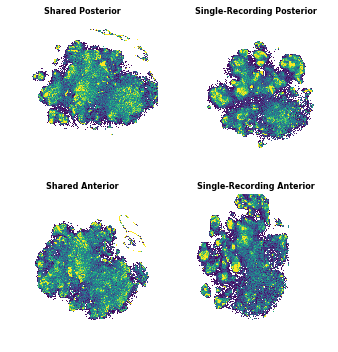

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

for i, fname in enumerate(fnames):
    # Plot density
    _ax = ax[i%2][i//2]
    if Hs[i] is not None:
        #_cm = LinearSegmentedColormap.from_list('fire', colors=colorcet.viridis)
        a = (Hs[i] * 255.0 / Hs[i].max())
        a[a < 25] = np.nan
        _ax.imshow(a, cmap='viridis')
    else:
        _ax.imshow(np.full((200, 200), 255), cmap='gray_r')
    
    # Configure axes
    _ax.set_axis_off()
    _ax.set_xlim(10, 190)
    _ax.set_ylim(10, 190)
    
    # Set title
    _ax.set_title(['Shared Posterior', 'Shared Anterior', 
                   'Single-Recording Posterior', 'Single-Recording Anterior'][i], fontsize=8)
        
fig.tight_layout()
#fig.savefig('C:/Users/acorver/Desktop/paper-figures/Fig2b.pdf', dpi=600)

In [7]:
import colorcet
import matplotlib.colors
import matplotlib.cm as cm

class customColormap(matplotlib.colors.LinearSegmentedColormap):
    def __init__(self, *args, **kwargs):
        self.baseCM = cm.get_cmap('cet_CET_L17')
        self.N = self.baseCM.N
    def __call__(self, r, *args, **kwargs):
        def mapColor(x):
            _c = self.baseCM(0.0, *args, **kwargs)
            lim = 0.10
            if x >= lim:
                return self.baseCM((x-lim)/(1.0 - lim), *args, **kwargs)
            else: 
                if isinstance(_c[0], float):
                    z = (x / 0.05)
                    a = _c[0] * z + 1.0 * (1 - z)
                    b = _c[1] * z + 1.0 * (1 - z)
                    c = _c[2] * z + 1.0 * (1 - z)
                    _c = (a, b, c, 1.0)
                    return _c
                else:
                    z = (x / lim)
                    a = int(_c[0] * z + 255.0 * (1 - z))
                    b = int(_c[1] * z + 255.0 * (1 - z))
                    c = int(_c[2] * z + 255.0 * (1 - z))
                    _c = (a, b, c, 255)
                    return _c
        if r.ndim == 2:
            _c = self.baseCM(0.0, *args, **kwargs)
            cs = np.array([[mapColor(y) for y in x] for x in r], 
                dtype=np.float64 if isinstance(_c[0], float) else np.uint8)
            return cs
        elif r.ndim == 1:
            _c = self.baseCM(0.0, *args, **kwargs)
            cs = np.array([mapColor(y) for y in r], 
                dtype=np.float64 if isinstance(_c[0], float) else np.uint8)
            return cs
        else:
            print('!!')

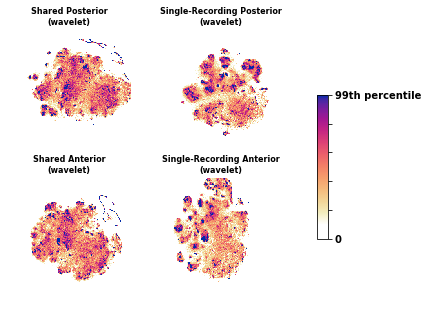

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5), facecolor='w')

_cm = customColormap()

_imsh = None
for i, fname in enumerate(fnames):
    # Plot density
    _ax = ax[i%2][i//2]
    if Hs[i] is not None:
        _hm = Hs[i].copy()
        _imsh2 = _ax.imshow(_hm / _hm.max(), cmap=_cm)
        if _imsh is None:
            _imsh = _imsh2
    else:
        _ax.imshow(np.full((200, 200), 255), cmap=_cm)
    
    # Configure axes
    _ax.set_axis_off()
    _ax.set_xlim(10, 190)
    _ax.set_ylim(10, 190)
    
    # Set title
    _ax.set_title(['Shared Posterior\n(wavelet)', 'Shared Anterior\n(wavelet)', 
                   'Single-Recording Posterior\n(wavelet)', 'Single-Recording Anterior\n(wavelet)'][i], fontsize=8)

# Add color scale bar
cbar_ax = fig.add_axes([0.99, 0.3, 0.03, 0.4])
cbar = fig.colorbar(_imsh, cax=cbar_ax)
cbar.ax.set_yticklabels(['0', '', '', '', '', '99th percentile'])

# Finalize figure layout
fig.savefig('C:/Users/acorver/Desktop/paper-figures/Fig_suppl_2a.pdf', dpi=600, bbox_inches='tight')